#  TP2- Régression linéaire "from scratch"
# 2.1- Modélisation 


*** 
### Remarques valables pour les TPs :
<span style="color:green"> <strong>Les cellules comportent des codes exécutables, des commentaires et des questions. 
Les questions sont soit posées explicitement (Exercices, Questions) ou juste avec un point d'intérrogation  **?**  qui suit ce que l'on vous demande d'effectuer. <strong></span>
***  

## Objectifs: 
- Apprendre à construite et à implémenter les modèles simples $f_{w,b}$ 
- On commence simple avec la regression linéaire 


# Notation
Les notations que nous allons utiliser<br>

| Notation     | Description                                                  | Python (if applicable)  | 
| :------------| :------------------------------------------------------------ | :---------------------- |
| $a$          | scalaire  simple (pas en gras)                                |                         | 
| $\mathbf{a}$ | vecteur, en gras                                              |                         | 
| **Régression**       ||| 
| $\mathbf{x}$ |   Un exemple de Trainig par exemple - supérficie (1000 ))  | `x_train` |
| $\mathbf{y}$ |   Les labels (Etiquettes) (target) (par exemple le prix (1000s euros)). | `y_train`  |
| $x^{(i)}$, $y^{(i)}$ | $i_{ème} $un exemple d'entraiinemen( (Training Example) | `x_i`, `y_i`|
| $m$ |  nombre d'exemples (training examples) |`m` |
| $w$  | paramètre                                  | `w`    |
| $b$  | paramètre: le biais                                    | `b`      |
| $f_{w,b}(x^{(i)})$ | le résultat prédit par $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  pour l'exemple $x_i$ |`f_wb` |



## Les modules (librairies)  
Nous allons exploter principaleement les deux librairies ci-dessous
- NumPy, 
- Matplotlib, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<a name="1"></a>
## 1- Le Dataset 
[//]: <> (<img align="left" src="./images/C1_W1_L3_S1_trainingdata.png"   style=" width:380px; padding: 10px;  " />)

Nous allons utiliser l'exemple de  prédiction du prix des logements.  
dans ce TP on utilisera un ensemble de données simple avec seulement deux exemples - une maison de 100 $m^2$  vendue pour 300 000$€$ et une maison de 200 $m^2$ vendue pour 500 000$€$. 
Ces deux points constitueront notre *ensemble de données ou d'entraînement*. 
Dans ce TP, les unités de taille sont 100 $m^2$ et les unités de prix sont des milliers d'euros.


| Superficie (100 $m^2$)  | Prix (1000s euros ) |
| ------------------| ------------------------ |
| 1.0              | 300                      |
| 2.0               | 500                      |

On aimerait construire  un modèle de régression linéaire pour ces deux points, afin de pouvoir prédire le prix d'autres maisons - par exemple, une maison de 120 m².

### Création des données x_train et y_train 

In [2]:
# x_train varibles d'entrée (les caractéristiques)
# y_train est le target
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


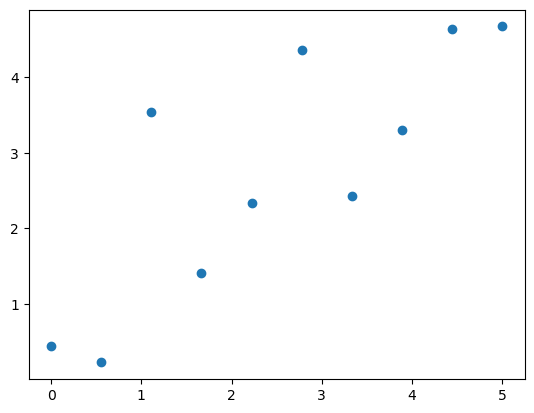

In [3]:
#On peut aussi créer automatiquement un échantillon d e m exemples, les valeurs sont espacées de 5
np.random.seed(5)
m = 10
x_train_m = np.linspace(0, 5, m).reshape(m,1)
y_train_m = x_train_m + np.random.randn(m, 1)

# tracer les points
plt.scatter(x_train_m, y_train_m)
plt.show()

### Nombre d'exemples 
On utilisera `m` pour indiquer le nombre d'exemples d'apprentissage. 
Les tableaux Numpy ont un paramètre `.shape`. `x_train.shape` renvoie un tuple python avec une entrée pour chaque dimension. 
`x_train.shape[0]` renvoie le nombre d'exemples.

### Questions : 
Ecrire le code python (utiliser la fonction shape) qui permet d'afficher la dimension du tableau d'entrainement (X_train) et le nombre d'exemples d'entrainement ($m$)

In [4]:
# m est le nombre d'exemples
np.shape(x_train_m)

(10, 1)

On peut également utiliser la fonction Python `len()` comme indiqué ci-dessous.

In [5]:
# m est le nombre d'exemples de training
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


### Exemple d'entrainement $x^i$, $y^i$

On utilise $(x^{(i)}$, $y^{(i)}$) pour désigner le $i^{ième}$ exemple d'apprentissage. <br>
Comme Python est indexé par zéro, (x$^{(0)}$, y$^{(0)}$) est (1.0, 300.0) et (x$^{(1)}$, y$^{(1)}$) est (2.0, 500.0).

Pour accéder à une valeur dans un tableau Numpy, on indexe le tableau avec le décalage souhaité. 
Par exemple, la syntaxe pour accéder à l'emplacement zéro de `x_train` est `x_train[0]`.
Exécutez le bloc de code suivant pour obtenir le $i^{th}$ exemple d'entraînement.

In [6]:
i = 0 # changer i metre pour visuaiser (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### Tracé des données
On peut tracer ces deux points en utilisant la fonction `scatter()` de la bibliothèque `matplotlib` (vu précedemment).<br>
Les arguments de la fonction `marker` et `c` affichent les points sous forme de croix rouges (la valeur par défaut est le point bleu).

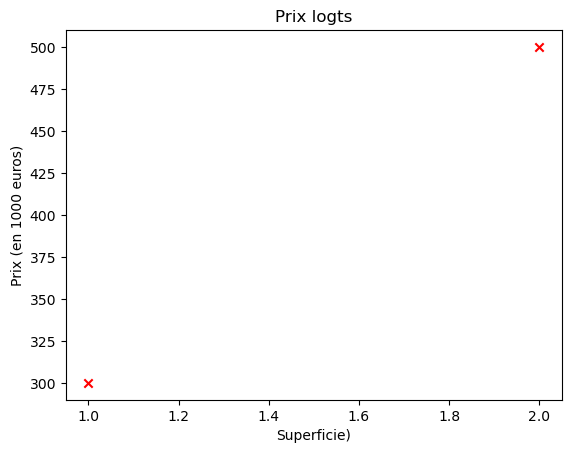

In [7]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Prix logts")
# Set the y-axis label
plt.ylabel('Prix (en 1000 euros)')
# Set the x-axis label
plt.xlabel('Superficie)')
plt.show()

## Question 
On peut tracer la courbe en utilisant des lignes (couleur bleue, les points marqués X).

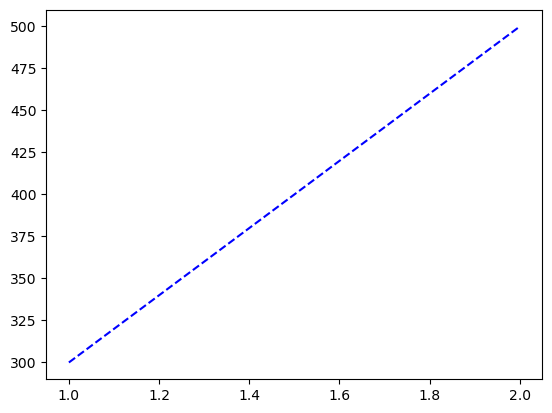

In [8]:
# Plot the data points
plt.plot(x_train,y_train,'b--')
plt.show()

<a name="2"></a>
## 2- Le modèle (Fonction hypothèse)

[//]: <> (<img align="left" src="../images/C1_W1_L3_S1_model.png"     style=" width:380px; padding: 10px; " >)
Comme décrit dans le cours, la fonction modèle pour la régression linéaire (qui est une fonction qui passe de `x` à `y`) est représentée par
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
La courbe change en fonction des valeurs  $w$ et $b$ . <br/> 
Essayons de voir la forme de la courbe, commençons par $w = 100$ et $b = 100$.
On garde non deux points: 
- **x_train = np.array([1.0, 2.0])**<br>
- **y_train = np.array([300.0, 500.0])**

In [9]:
w = 200
b = 200
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"w: {w}")
print(f"b: {b}")

w: 200
b: 200


#### Question :

Ecrire la fonction  qui renvoie  la valeur de $f_{w,b}(x^{(i)})$ pour nos deux points de données. <br>
Vous pouvez l'écrire explicitement pour chaque point de données sous la forme -
- pour  $x^{(0)}$, `f_wb = w * x[0] + b`
- pour $x^{(1)}$, `f_wb = w * x[1] + b`

Pour un grand nombre de points de données, cela peut devenir lourd et répétitif. A la place, vous pouvez (devez) calculer la sortie en utilisant une boucle `for`. <br>

**Note** : La description de l'argument `(ndarray (m,))` décrit un tableau Numpy à n dimensions de forme (m,). 

> **Note**: `np.zero(n)` retourne un vecteur de n zéros


In [10]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      y (ndarray (m,)): target values
    """
    f_wb = x * w +b
    print("before cmo")
    print(x)
    print("after cmo")
    print(f_wb)
    return f_wb # renvoie le résultat de le vecteur comportant les résultats de f

compute_model_output(x_train,w,b)

before cmo
[1. 2.]
after cmo
[400. 600.]


array([400., 600.])

### Questions : 
Ecrire le code qui permet :
- Appel de la fonction  `compute_model_output` 
- plot le modèle prédit 
- plot les points (des exemples)
- +légende 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


before cmo
[[0.        ]
 [0.55555556]
 [1.11111111]
 [1.66666667]
 [2.22222222]
 [2.77777778]
 [3.33333333]
 [3.88888889]
 [4.44444444]
 [5.        ]]
after cmo
[[ 200.        ]
 [ 311.11111111]
 [ 422.22222222]
 [ 533.33333333]
 [ 644.44444444]
 [ 755.55555556]
 [ 866.66666667]
 [ 977.77777778]
 [1088.88888889]
 [1200.        ]]
before cmo
[[0.44122749]
 [0.2246854 ]
 [3.5418823 ]
 [1.41457454]
 [2.33183206]
 [4.36025889]
 [2.42410093]
 [3.29725223]
 [4.63204767]
 [4.67013004]]
after cmo
[[ 288.24549738]
 [ 244.93708073]
 [ 908.37645962]
 [ 482.91490741]
 [ 666.36641276]
 [1072.05177897]
 [ 684.8201857 ]
 [ 859.45044619]
 [1126.40953406]
 [1134.02600844]]


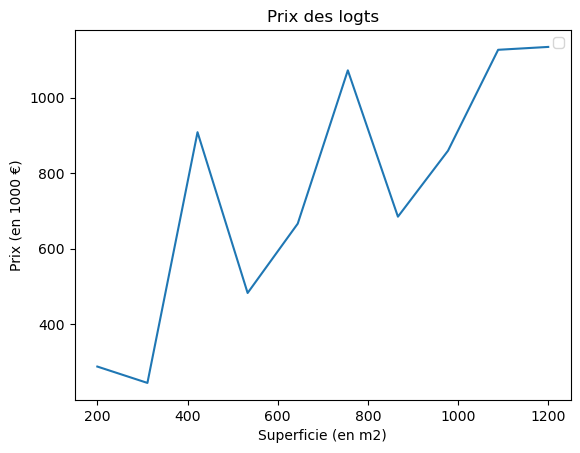

In [11]:
#Solution



plt.plot(compute_model_output(x_train_m,w,b),compute_model_output(y_train_m,w,b))
# Set the title
plt.title("Prix des logts")
# Set the y-axis label
plt.ylabel('Prix (en 1000 €)')
# Set the x-axis label
plt.xlabel('Superficie (en m2)')
plt.legend()
plt.show()



<details>
<summary>
    <font size='3', color='darkgreen'><b>Constat</b></font>
</summary>
    <p>
    <ul>
        <li>!!! Comme vous pouvez le voir, les valeurs $w = 100$ et $b = 100$ ne donnent pas de ligne qui correspond à nos données.

Essayez  avec différentes valeurs de $w$ et $b$. 
Quelles devraient être les valeurs pour obtenir une ligne qui correspond à nos données ?<br>

            
Essayez $w = 200$ and $b = 100$ </li>
    </ul>
    </p>

<a name="3"></a>
## 3- Prédiction
Maintenant que nous disposons d'un modèle, nous pouvons l'utiliser pour faire notre prédiction initiale. Prédisons le prix d'une maison de 120 $m^2$.

w = 200
b = 100
x_i = 1.2
cost_200 = w * x_i + b

print(f"€{cost_200:.0f} mille euros")

## Exercice 
Reécrire la fonction du modèle (`compute_model_output()`) dans le cas ou 
ou le dataset d'entraînement possède n variables. Testez la fonction pour une valeur de $n$ donnée.


In [12]:
w = 200
b = 100
x_i = 1.2
cost_200 = w * x_i + b

In [13]:
print(cost_200)

340.0


In [14]:
def compute_model_output2(matrice,poids,biais):
    m = np.shape(matrice)[0]
    f_wb=np.zeros(m)
    for i in range (m):
        for j in range(0,np.shape(matrice)[1]):
            f_wb[i] += matrice[i][j] * poids[j]
        f_wb[i] += biais
    return  f_wb

multi_x = np.ones((10,10))
print(compute_model_output2(multi_x, np.ones(10,), 5))

[15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
